In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-fp-converge)

We revisit {numref}`Demo %s <demo-fp-spiral>` and investigate the observed convergence more closely. Recall that above we calculated $g'(p)\approx-0.42$ at the convergent fixed point.

In [2]:
f = @(x) x.^2 - 4*x + 3.5;
r = roots([1, -4, 3.5]);

Here is the fixed-point iteration. This time we keep track of the whole sequence of approximations.

:::{index} Julia; push!
:::

In [3]:
g = @(x) x - f(x);
x = 2.1; 
for k = 1:12
    x(k+1) = g(x(k));
end

It's illuminating to construct and plot the sequence of errors.

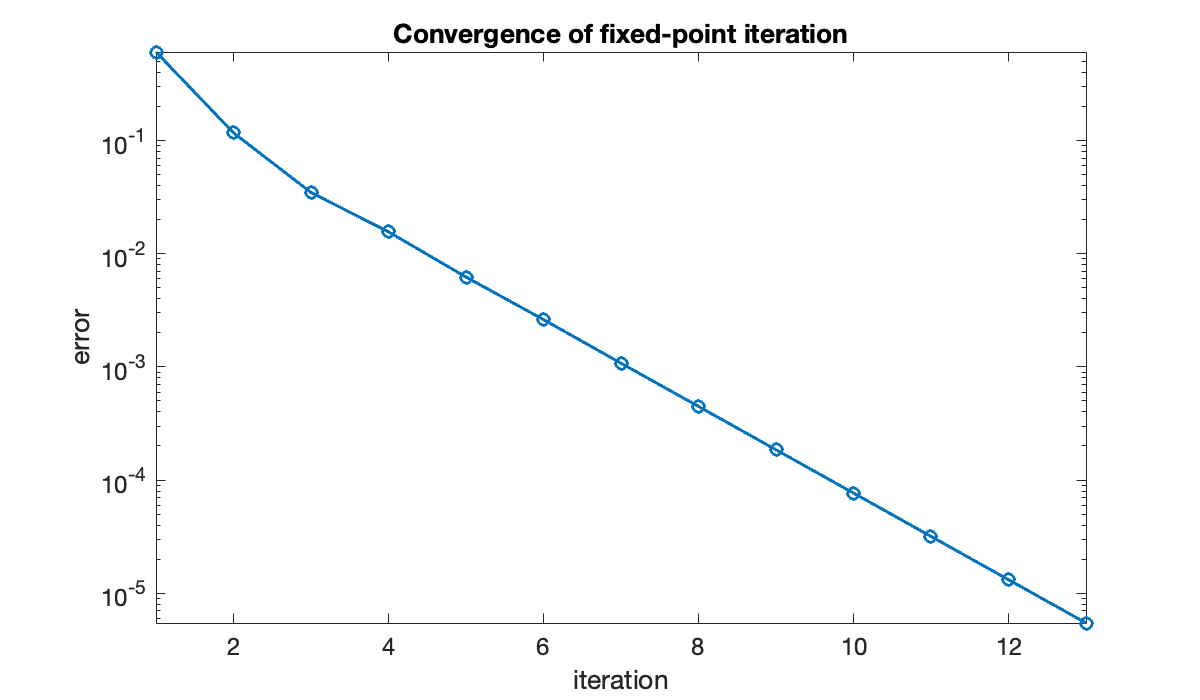

In [4]:
err = abs(x - r(1));
clf
semilogy(err, 'o-'), axis tight
xlabel('iteration'),  ylabel('error')
title(('Convergence of fixed-point iteration'));

It's quite clear that the convergence quickly settles into a linear rate. We could estimate this rate by doing a least-squares fit to a straight line. Keep in mind that the values for small $k$ should be left out of the computation, as they don't represent the linear trend.

In [5]:
y = log(err(5:12));
p = polyfit(5:12, y, 1);

We can exponentiate the slope to get the convergence constant $\sigma$.

In [6]:
sigma = exp(p(1))

sigma = 0.4145

The error should therefore decrease by a factor of $\sigma$ at each iteration. We can check this easily from the observed data.

In [7]:
err(9:12) ./ err(8:11)

ans = 1×4 double
    0.4138    0.4144    0.4141    0.4142

The methods for finding $\sigma$ agree well.